## Gradient Descent Algorithm

Gradient descent (also often called steepest descent) is a first-order iterative optimization algorithm for finding a local minimum of a differentiable function. The idea is to take repeated steps in the opposite direction of the gradient (or approximate gradient) of the function at the current point, because this is the direction of steepest descent. Conversely, stepping in the direction of the gradient will lead to a local maximum of that function; the procedure is then known as gradient ascent [(Wiki)](https://en.wikipedia.org/wiki/Gradient_descent).
 
Implemented for univariate linear regression.
Referenced from Stanford Machine Learning course.  

### Environment Setup

In [1]:
# data array and visualisation libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

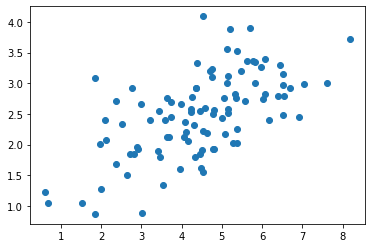

In [2]:
# read and visualise dataset
df = pd.read_csv('data.csv')
x = np.array(df['X'])
y = np.array(df['y'])

plt.scatter(x,y)

### Referenced Equations

### (1) Hypothesis:  $ h_{\theta}(x) = \theta_{0} + \theta_{1}x$  
### (2) Parameters: $ \theta_{0}, \theta_{1} $
### (3) Cost Function: $ J(\theta_{0}, \theta_{1}) = \frac{1}{2m}\sum \limits _{i=1} ^{m} (h_{\theta}(x^{(i)})-y^{(i)}) $
### (4) Gradient Descent: $ \theta_{j} := \theta_{j} - \alpha \frac{\partial}{\partial\theta_{j}}J(\theta_{0}, \theta_{1}) $

In [11]:
# gradient descent function
def gradient_descent(x,y,iter,a):
    theta0 = theta1 = 0       # set initial parameters (2)
    iterations = iter         # set no. of iterations
    m = len(x)                # count dataset rows
    learning_rate = a         # set learning rate (4 - alpha)
    all_cost = []
    
    
    for i in range(iterations):
        y_predicted = theta0 + theta1 * x            # find H(x) using parameters and x values (1)
        cost = (1/(2*m))*sum((y_predicted-y)**2)     # find Cost using Cost Function (3)
        
        J0 = (1/m) * sum(y_predicted-y)              # partial diff of J0 (4)
        J1 = (1/m) * sum((y_predicted-y)*x)          # partial diff of J1 (4)
        theta0 = theta0 - learning_rate * J0         # Gradient Descent (4) and Update Parameters (2)
        theta1 = theta1 - learning_rate * J1         # Gradient Descent (4) and Update Parameters (2)
        
        all_cost.append(cost)
            
        # print ('theta0: {}, theta1: {}, cost: {}, iteration: {}'.format(theta0, theta1, cost, i))
        # ^ to show respective values when each loop is performed ^
        
    print('\nFinal Values\nTheta0: {}, Theta1: {}'.format(theta0, theta1))
    return theta0, theta1, all_cost

# initalise and call function
iter = 200
a = 0.001
gd_df = gradient_descent(x,y,iter,a)

# reassign returned values
theta = gd_df[:2]
all_cost = np.reshape(gd_df[2:], [iter,1])


Final Values
Theta0: 0.12451764233784295, Theta1: 0.5026293827783891


**Best Fit Line**

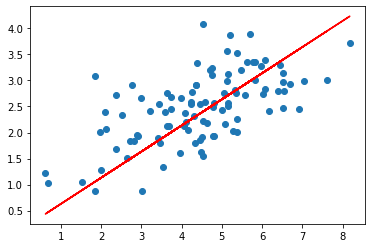

In [12]:
# Use `theta` values plot best fit line
Hypothesis = theta[0] + theta[1] * x

plt.scatter(x,y)
plt.plot(x,Hypothesis, color='Red')

**Cost value for each iteration**

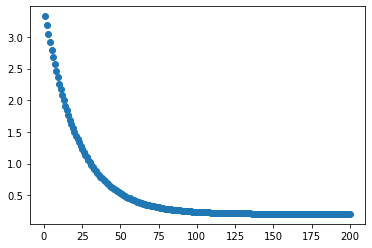

In [13]:
plt.scatter(np.arange(1,len(all_cost)+1),all_cost)